In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
def bookscraper(url):

    '''
    Gets all information of a specific book
    :param url: url of one book
    :return: dictionary with all information of a book
    '''
    page_book = requests.get(url)
    soup_book = BeautifulSoup(page_book.content, 'html.parser')

    title = None
    author = None
    num_reviews = None
    num_ratings = None
    avg_rating = None
    num_pages = None
    original_publish_year = None
    genres = None
    awards = None
    places = None

    try:
        title = soup_book.find("h1").text.strip()
    except:
        pass
    try:
        author = soup_book.find("span", itemprop="name").text.strip()
    except:
        pass
    try:
        num_reviews = int(soup_book.find("meta", itemprop="reviewCount").get('content'))
    except:
        pass
    try:
        num_ratings = int(soup_book.find("meta", itemprop="ratingCount").get('content'))
    except:
        pass
    try:
        avg_rating = float(soup_book.find("span", itemprop="ratingValue").text.strip())
    except:
        pass
    try:
        num_pages = int(soup_book.find("span", itemprop="numberOfPages").text.strip().split(' ')[0])
    except:
        pass
    try:
        details = soup_book.find("div", id="details")
        original_publish_year = details.find_all("div", class_="row")[-1].text.strip().split(' ')
        for element in original_publish_year:
            try:
                original_publish_year = int(element)
                break
            except:
                pass

    except:
        pass
    try:
        series = soup_book.find("h2", id="bookSeries").text.strip()
        if series.strip() == "" or series == None:
            series = 0
        else:
            series = 1
    except:
        series = 0
    try:
        genres_list = soup_book.find_all("a", class_="actionLinkLite bookPageGenreLink")
        genres = ";".join([genre.text for genre in genres_list])
    except:
        pass
    try:
        awards_list = soup_book.find_all("a", class_="award")
        awards = ";".join([award.text for award in awards_list])
    except:
        pass
    try:
        places_detail = details.find("div",id="bookDataBox").findChildren("div", recursive=False)
        i=0
        while i<len(places_detail):
            if places_detail[i].text == "Setting":
                places_html = places_detail[i+1]
                break
            i += 1
        places = ';'.join([place.text for place in places_html.find_all('a')])
    except:
        pass

    to_append = {"url": url , "title":title,"author":author,"num_reviews":num_reviews,"num_ratings":num_ratings,"avg_rating":avg_rating,\
                 "num_pages":num_pages,"original_publish_year":original_publish_year,"series":series,"genres":genres,"awards":awards,"places":places}
    return to_append

In [3]:
def scraper():
    '''
    Loop all best Dystopian_and_Post_Apocalyptic_Fiction books in goodreads webpage
    :return: save a csv document with all information books
    '''
    base_url = 'https://www.goodreads.com'

    for i in range(1,12):
        df = pd.DataFrame(columns=["url", "title", "author", "num_reviews", "num_ratings", "avg_rating", "num_pages",
                                   "original_publish_year", "series", "genres", "awards", "places"])
        page = requests.get(f'https://www.goodreads.com/list/show/29013.Best_Biographies_?page={i}')
        soup = BeautifulSoup(page.content, 'html.parser')
        book_titles = soup.find_all('a', class_="bookTitle")
        for book in book_titles:
            try:
                id_book = book.get('href')
                data_to_append = bookscraper(base_url+id_book)
                df_to_append = pd.DataFrame(data_to_append, index=[0])
                df = df.append(df_to_append, ignore_index=True)
            except:
                pass
        df.to_csv(path_or_buf='book_data.csv', mode='a', sep='&', header=True)

In [4]:
data=scraper()

In [7]:
data=pd.read_csv('C:/Users/Venati Himanth/OneDrive/Desktop/my/book_data.csv', sep='&')
data.head(3)

,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places
0,0.0,https://www.goodreads.com/book/show/11084145-s...,Steve Jobs,Walter Isaacson,19583,1077829,4.15,627,2011,0,Biography;Nonfiction;Business;Science;Technolo...,Financial Times and McKinsey Business Book of ...,"San Francisco Bay Area, California"
1,1.0,https://www.goodreads.com/book/show/8664353-un...,"Unbroken: A World War II Story of Survival, Re...",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2.0,https://www.goodreads.com/book/show/10884.Eins...,Einstein: His Life and Universe,Walter Isaacson,3838,158340,4.12,675,2007,0,Biography;Nonfiction;Science;History;Science;P...,Audie Award for Biography/Memoir (2008),Europe


In [8]:
data['awards'] = data['awards'].str.split(';').str.len()

In [9]:
data['awards']=data.awards.fillna(0)

In [10]:
data['awards']=data.awards.astype(int)

In [11]:
data.isnull().sum()

Unnamed: 0                10
url                        0
title                      0
author                   125
num_reviews              125
num_ratings              125
avg_rating               125
num_pages                175
original_publish_year    126
series                     0
genres                   222
awards                     0
places                   990
dtype: int64

In [12]:
# drop all rows with any NaN and NaT values
#TODO think which columns can't have None values and drop na
data= data.dropna(subset=['author'])
data= data.dropna(subset=['num_reviews'])
data=data.dropna(subset=['num_ratings'])
data = data.dropna(subset=['avg_rating'])
#data = data.drop_duplicates(subset=['title'])
data = data.reset_index(drop=True)

In [13]:
#checking the shape after droping the null values
print(data.shape)
#finding the null values in the dataset
print(data.isnull().sum())

(972, 13)
Unnamed: 0                10
url                        0
title                      0
author                     0
num_reviews                0
num_ratings                0
avg_rating                 0
num_pages                 50
original_publish_year      1
series                     0
genres                    97
awards                     0
places                   865
dtype: int64


In [14]:
#Here we are dropping the Duplicate observations in the data frame
data.drop_duplicates()

,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places
0,0.0,https://www.goodreads.com/book/show/11084145-s...,Steve Jobs,Walter Isaacson,19583,1077829,4.15,627,2011,0,Biography;Nonfiction;Business;Science;Technolo...,3,"San Francisco Bay Area, California"
1,2.0,https://www.goodreads.com/book/show/10884.Eins...,Einstein: His Life and Universe,Walter Isaacson,3838,158340,4.12,675,2007,0,Biography;Nonfiction;Science;History;Science;P...,1,Europe
2,3.0,https://www.goodreads.com/book/show/1845.Into_...,Into the Wild,Jon Krakauer,23442,954540,3.99,207,1997,0,Nonfiction;Biography;Travel;Adventure;Classics...,1,"Mexico;Virginia;The Slabs, Mojave Desert, Cali..."
3,4.0,https://www.goodreads.com/book/show/2203.John_...,John Adams,David McCullough,6622,344212,4.04,751,2001,0,History;Biography;Nonfiction;North American Hi...,6,"Boston, Massachusetts;Philadelphia, Pennsylvania"
4,5.0,https://www.goodreads.com/book/show/2199.Team_...,Team of Rivals: The Political Genius of Abraha...,Doris Kearns Goodwin,7504,178160,4.22,916,2006,0,History;Nonfiction;Biography;Politics;North Am...,4,"Springfield, Illinois;Chicago, Illinois;Illinois"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,94.0,https://www.goodreads.com/book/show/78393.Sex_...,"Sex with Kings: 500 Years of Adultery, Power, ...",Eleanor Herman,821,7057,3.69,304,2005,0,History;Nonfiction;Historical;Biography;Histor...,0,NaN
968,95.0,https://www.goodreads.com/book/show/571622._We...,"""We are Lincoln Men"": Abraham Lincoln and His ...",David Herbert Donald,27,377,4.0,269,2003,0,History;Military History;Civil War;Biography;N...,0,NaN
969,97.0,https://www.goodreads.com/book/show/667678.Col...,Coltrane: Chasin' the Trane,J.C. Thomas,15,265,3.92,280,1976,0,Music;Biography;Music;Jazz;Nonfiction;History,0,NaN
970,98.0,https://www.goodreads.com/book/show/7939034-th...,The End and the Beginning: Pope John Paul II -...,George Weigel,29,198,4.34,608,2010,0,Religion;History;Nonfiction;Biography;Christia...,1,NaN


In [15]:
#checking the Author column containing the numerice values count
data.author.str.contains(r'[0-9]').value_counts()

False    972
Name: author, dtype: int64

In [16]:
#Converting the object data type to numerice data type
data['avg_rating'] = pd.to_numeric(data['avg_rating'],errors = 'coerce')

In [17]:
# MinMax Normilization on avg_rating and scaling from 0 to 10 and saving it into the minmax_norm_rating
data['minmax_norm_rating'] = 1 + (data['avg_rating'] - data['avg_rating'].min()) / (data['avg_rating'].max() - data['avg_rating'].min()) * 9

In [18]:
# Mean normilization
data['mean_norm_rating'] = 1 + (data['avg_rating'] - data['avg_rating'].mean()) / (data['avg_rating'].max() - data['avg_rating'].min()) * 9

In [20]:
# Converting the awards column into numerical data

data = data.rename(columns={'title': 'Title', 'original_publish_year': 'Publication_year', 'minmax_norm_rating': 'Rating', 'awards':'Awards', 'num_pages':'Nº pages', 'series':'Series'})

In [21]:
# analysis for the authors book publication
def best_author_book(author, data):
 return data[data['author']==author].sort_values("Rating", ascending=False)['Title'].head(1).item()

In [22]:
#finding the best authors book by giving the author name to the function
best_author_book(author='Robert K. Massie',data=data)

'Nicholas And Alexandra'

In [23]:
# analysis for the finding the author on the year based on the Ratings
def best_author_year(Publication_year, data):
 return data[data['Publication_year']==Publication_year].sort_values("Rating", ascending=False)['author'].head(1).item()

In [24]:
#finding the best author by giving the publication_year to the function
best_author_year(Publication_year='2006',data=data)

'Martin Lings'

In [25]:
#Group the books by original_publish_year and get the mean of the minmax_norm_ratings of the groups

data.groupby(['Publication_year'])['Rating'].mean()

Publication_year
1952                     8.506000
1956                     8.200000
1960                     8.470000
1964                     8.974000
1966                     6.400000
                           ...   
2019                     8.307419
2020                     9.253391
2021                     8.377750
2022                     6.250000
original_publish_year         NaN
Name: Rating, Length: 61, dtype: float64

In [30]:
data.to_csv('my_data.csv',sep='&',index=True)

In [32]:
new_data=pd.read_csv('C:/Users/Venati Himanth/OneDrive/Desktop/my/my_data.csv',sep='&')

new_data

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Company profit per month')

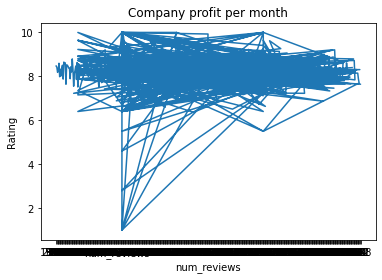

In [47]:
plt.plot(new_data['num_reviews'],new_data['Rating'])
plt.xlabel('num_reviews')
plt.ylabel('Rating')
plt.title('Company profit per month')

In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        972 non-null    int64  
 1   Unnamed: 0.1      962 non-null    float64
 2   url               972 non-null    object 
 3   Title             972 non-null    object 
 4   author            972 non-null    object 
 5   num_reviews       972 non-null    object 
 6   num_ratings       972 non-null    object 
 7   avg_rating        962 non-null    float64
 8   Nº pages          922 non-null    object 
 9   Publication_year  971 non-null    object 
 10  Series            972 non-null    object 
 11  genres            875 non-null    object 
 12  Awards            972 non-null    int64  
 13  places            107 non-null    object 
 14  Rating            962 non-null    float64
 15  mean_norm_rating  962 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory u